# Instructions

Consider the following first-order partial differential equation
$$
{\large\begin{array}{lll}
{\large \frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0} & , & t>0,\ x\in\mathbb{R}\\
u(0,x)=f(x) & , & x\in\mathbb{R}
\end{array}}
$$
where the unknown function $u=u(t,x)$ is a function of two variables $t$ (time) and $x$ (space), $a>0$ is a constant, and the differentiable function $f=f(x)$ defines the initial condition of $u$.

---

### **Question 1**  &nbsp;&nbsp; (5 points)

Verify that the analytical solution of the PDE is given by 
$$
{\large\left.\begin{array}{lll}
u(t,x)=f(x-at) & , & t{\geq}0,\ x\in\mathbb{R}\end{array}\right.}
$$


---

### **Answer 1**  
Define

$${\large\left.\begin{array}{lll}
u(t,x)=f(x-at) & , & t{\geq}0,\ x\in\mathbb{R}\end{array}\right.}$$ 

The partial derivatives and initial values of $u$ are given by

$${\large\begin{array}{ccccc}
\frac{\partial u}{\partial t}(t,x)=-af'(x-at) &  & \frac{\partial u}{\partial x}(t,x)=f'(x-at) &  & u(0,x)=f(x)\end{array}}$$

Therefore it is true that $\frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0$, which means that $u(t,x)=f(x-at)$ solves the PDE and has the proper initial condition.  

---

We are going to approximate the solution of the PDE by finite-difference schemes. Introduce the uniform grids
$$
{\large\begin{array}{lll}
t_{i}=i\times\Delta_{t}\ , & i=0,1,\ldots,N & \mathrm{where}\ \Delta_{t}=\frac{t_{N}}{N}\\
x_{j}=x_{0}+j\times\Delta_{x}\ , & j=0,1,\ldots,M & \mathrm{where}\ \Delta_{x}=\frac{x_{M}-x_{0}}{M}
\end{array}}
$$
Denote $u_{i,j}$ as the approximation of the solution $u(t_i,x_j)$ at time $t_i$ and space $x_j$. Similarly, define $f_j=f(x_j)$ for all $j=0,1,\ldots,M$.

### **Question 2**  &nbsp;&nbsp; (6 points)

Write a finite-difference scheme to approximate the solution of the PDE, where the time derivative $\frac{\partial u}{\partial t}$ is approximated by **forward difference**, and the space derivative $\frac{\partial u}{\partial x}$ is approximated by **backward difference**. <br>

> We call this finite difference scheme **Forward in Time, Backward in Space (FTBS)**. <br>

Show that this finite difference scheme can be written in the following form:
$$
{\large\left.\begin{array}{lll}
u_{i+1,j}=(1-\lambda)u_{i,j}+\lambda u_{i,j-1} & , & 0\leq i\leq N-1,\ 1\leq j\leq M\\
u_{0,j}=f_{j} & , & 0\leq j\leq M
\end{array}\right.}
$$
What is the definition of $\lambda$?  

---

### **Answer 2**  

For the statement, we know that:
$$
\Large
U_t(t_i, X_j) \approx \frac{u_{i + 1, j} - u_{i, j}}{\Delta_t} \\
U_x(t_i, X_j) \approx \frac{u_{i, j} - u_{i, j - 1}}{\Delta_x}
$$

Plug these two finite-difference approximations into the PDE to obtain the finite-difference scheme
$$
\Large 
\frac{u_{i + 1, j} - u_{i, j}}{\Delta_t} + a\frac{u_{i,j} - u_{i, j - 1}}{\Delta_x} = 0
$$
Define $b = a\Delta_t$ and $c = \Delta_x$.

For $j = 1, ..., M$,
$$
\Large
c\left( u_{i + 1, j} - u_{i,j} \right) + b\left( u_{i, j} - u_{i, j - 1} \right) = 0
$$

After rearranging, we have:
$$
\Large
\begin{aligned}
u_{i + 1, j} & =  \frac{c - b}{c}u_{i, j} +  \frac{b}{c}u_{i, j - 1} \\
u_{i + 1, j} & =  \frac{\Delta_x - a\Delta_t}{\Delta_x}u_{i, j} +  \frac{a\Delta_t}{\Delta_x}u_{i, j - 1}
\end{aligned}
$$
Thus, we have：
$$ 
\Large
\lambda = \frac{a\Delta_t}{\Delta_x}
$$


---

### **Question 3**  &nbsp;&nbsp; (4 points)

Introduce the vector $\mathbf{u_{i}}=[\begin{array}{cccc}u_{i,0} & u_{i,1} & \ldots & u_{i,M}\end{array}]^{\top}$. 

Write the FTBS scheme using matrix-vector notations as
$$
{\large\mathbf{u_{i+1}}=\mathbf{A_r}\cdot\mathbf{u_{i}}+\mathbf{B_r}{{\times}}u_{i,-1}}
$$
where $\mathbf{A_r}\in\mathbb{R}^{(M+1)\times(M+1)}$ is a constant matrix, $\mathbf{B_r}\in\mathbb{R}^{M+1}$ is a constant vector, and $u_{i,-1}=u(t_i,x_0-\Delta_x)$ is a **boundary condition** which needs to be provided in order to solve the finite-difference scheme.

What is the definition of $\mathbf{A_r}$ and $\mathbf{B_r}$?  

---

### **Answer 3**  

Based on Question 2, we know that, the $j = 0, \cdots, M$ equations at time $i$ are:
$$
\Large
\begin{aligned}
u_{i + 1, 0} & = & (1 - \lambda) u_{i, 0} & + \lambda u_{i, -1} \\
u_{i + 1, 1} & = & (1 - \lambda) u_{i, 1} & + \lambda u_{i, 0} \\
\vdots & = & \vdots &  \\ 
u_{i + 1, M} & = & (1 - \lambda) u_{i, M} & + \lambda u_{i, M - 1}
\end{aligned}
$$
In matrix notation, the system of equation is,
$$
\Large
\mathbf{u}_{i + 1, 0:M} = \mathbf{P}\mathbf{u}_{i, -1:M}
$$
where $\mathbf{P}$ is a $(M + 1)\times (M + 2)$ matrix:
$$
\mathbf{P} = 
\begin{bmatrix}
\lambda_{-1} & (1 - \lambda)_0 & 0 & \cdots & \cdots & 0 \\
0 & \lambda_0 & (1 - \lambda)_1 & \cdots & \cdots & \vdots \\
\vdots & & \ddots & \ddots & & \vdots \\
\vdots & & & \lambda_{M - 2} & (1 - \lambda)_{M - 1} & 0 \\
0 & \cdots & \cdots & \cdots & \lambda_{M - 1} & (1 - \lambda)_{M}
\end{bmatrix}
$$
Therefore, we have $\mathbf{A_r}\in \R^{(M + 1)\times(M + 1)}$ and $\mathbf{B_r}\in \R^{M + 1}$:
$$
{\color{yellow}\mathbf{A_r}} = 
\begin{bmatrix}
(1 - \lambda)_0 & 0 & \cdots & \cdots & 0 \\
\lambda_0 & (1 - \lambda)_1 & \cdots & \cdots & \vdots \\
\vdots & \ddots & \ddots & & \vdots \\
\vdots & & \lambda_{M - 2} & (1 - \lambda)_{M - 1} & 0 \\
0 & \cdots & \cdots & \lambda_{M - 1} & (1 - \lambda)_{M}
\end{bmatrix}
, \quad\quad
{\color{yellow}\mathbf{B_r}} = 
\begin{bmatrix}
\lambda_{-1} \\
0 \\
\vdots \\
\vdots \\
0
\end{bmatrix}
$$
$\mathbf{P} = \Bigg[ \mathbf{B_r} \Biggm| \mathbf{A_r} \Bigg]$





---

### **Question 4**  &nbsp;&nbsp; (7 points)

For simplicity in this exercise, we use the analytical solution to define the boundary condition:
$$
{\large u_{i,-1}=f(x_0-\Delta_x-at_i)}
$$
Implement the FTBS finite-difference scheme in Python. 

Use the following numerical parameters:
$$
{\large t_N=2, \ \ x_0=-4, \ \ x_M=4, \ \ a=1, \ \ f(x)=\frac{1}{\pi(1+x^2)}}
$$
Remark that $f$ is the probability distribution function of a standard **Cauchy** random variable. 

For $N$ and $M$, test the following combinations:
$$
{\large(N,M)\in\{(50,25),(150,75),(500,250)\}}
$$
Plot the solution you obtain for $\{u_{N,j}\}_{j=0,\ldots,M}$ (terminal solution). 

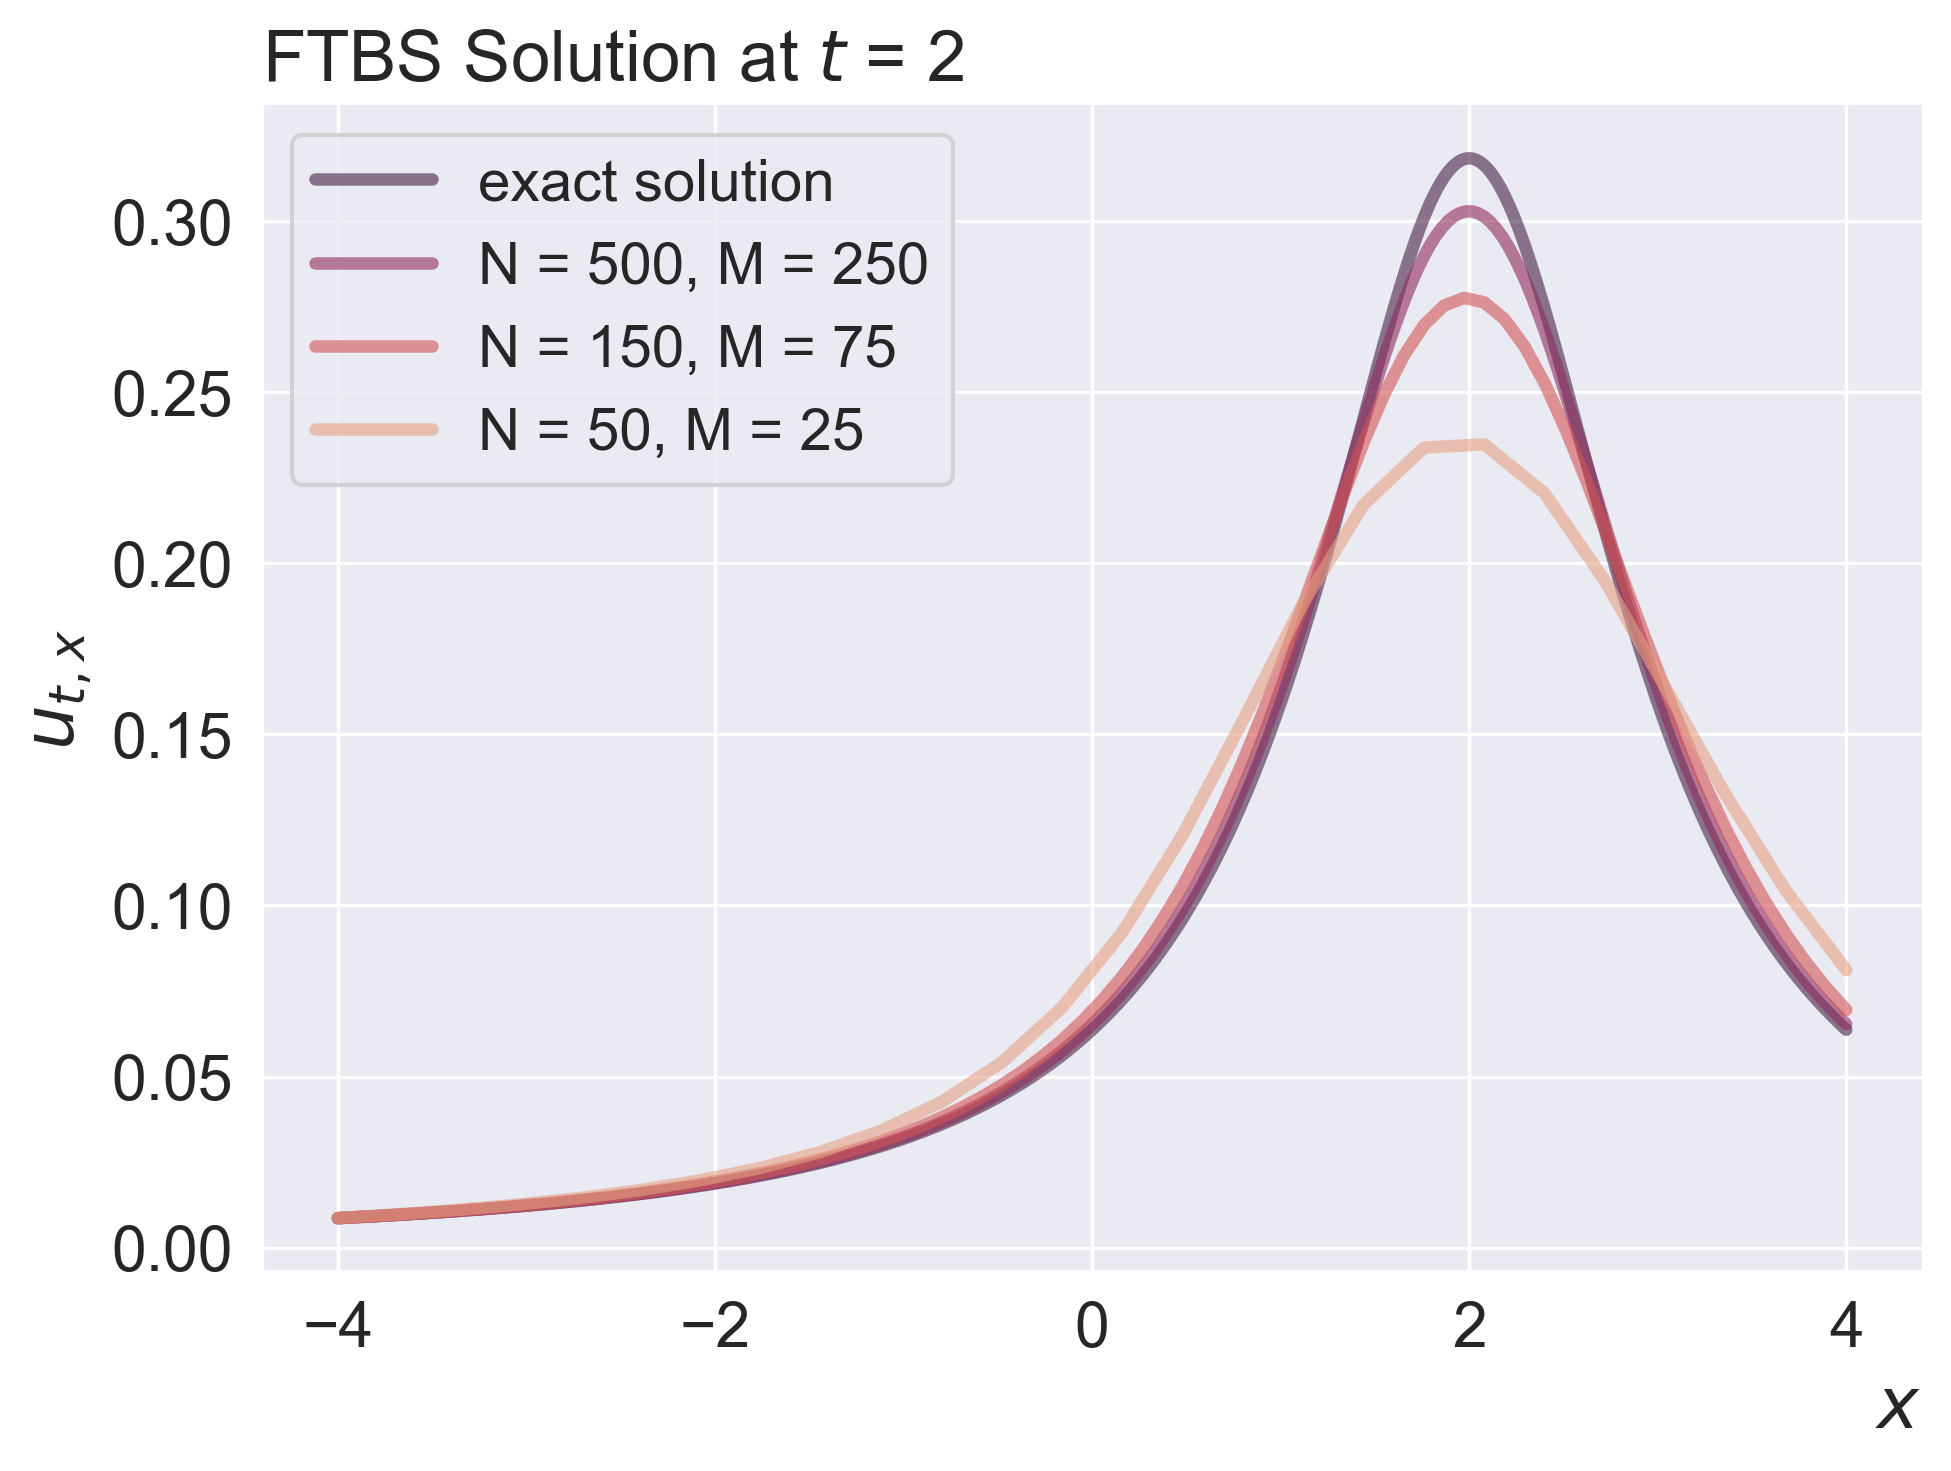

In [1]:
import numpy as np
from scipy.sparse import diags
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

rc={'font.size': 17,'axes.labelsize': 17,'legend.fontsize': 14,'figure.dpi': 300, 
    'axes.titlesize': 17, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc)
sns.set_style("darkgrid")
sns.set_palette("rocket",4,0.75)

def f(x):
    """
    Initial Condition - Cauchy distribution
    """
    return 1 / (np.pi * (1 + x ** 2))

def FTBS_Scheme(x0, xM, tN, N, M, a):
    """
    Utilize FTBS (Forward in Time, Backward in Space) finite-difference scheme to solve first-order PDE.

    Parameters:
    tN: 
        Terminal time
    x0, xM: 
        Space boundaries
    a: 
        Constant coefficient
    N, M: 
        Time and Space grid points
    """
    dt = tN / N
    dx = (xM - x0) / M
    lam = a * dt / dx

    tgrid = np.linspace(0.0, tN, N + 1)
    xgrid = np.linspace(x0, xM, M + 1)

    U = np.zeros([N + 1, M + 1])

    # Initial condition
    U[0, :] = f(xgrid)

    # Boundary condition
    xbound = x0 - dx - a * tgrid
    ubound = f(xbound)

    # Matrix construction
    diagonals = (1 - lam) * np.ones(M + 1)
    lower_diag = lam * np.ones(M)
    A = diags([diagonals, lower_diag], [0, -1])
    B = np.zeros(M + 1)
    B[0] = lam

    # Algorithm implementation
    for i in range(N):
        U[i + 1, :] = A @ U[i, :] + B * ubound[i]

    return U[N, :], xgrid

def FTBS_plot():
    tN, x0, xM, a = 2, -4.0, 4.0, 1.0
    xgrid = np.linspace(x0, xM, 1001)
    
    fig = plt.figure()
    ax = fig.add_subplot()

    y_analytical = f(xgrid - a * tN)
    sns.lineplot(x = xgrid, y = y_analytical, label = "exact solution", linewidth = 3, alpha = 0.6, ax = ax)
    
    grids = [(500, 250), (150, 75), (50, 25)]
    for idx, (N, M) in enumerate(grids):
        y_numerical, xgrid_numerical = FTBS_Scheme(x0, xM, tN, N, M, a = 1)
        sns.lineplot(x = xgrid_numerical, y = y_numerical, label = f"N = {N}, M = {M}", linewidth = 3, alpha = 0.6, ax = ax)

    sns.despine()
    ax.set_title(f"FTBS Solution at $t$ = {tN}", loc = "left")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$")
    fig.tight_layout(pad = 0.2)
    plt.show()

FTBS_plot()

---

### **Question 5**  &nbsp;&nbsp; (4 points)

What happens to your numerical solution if you choose $M$ much larger than $N$, for example $N=50$ and $M=500$. 

Why?  


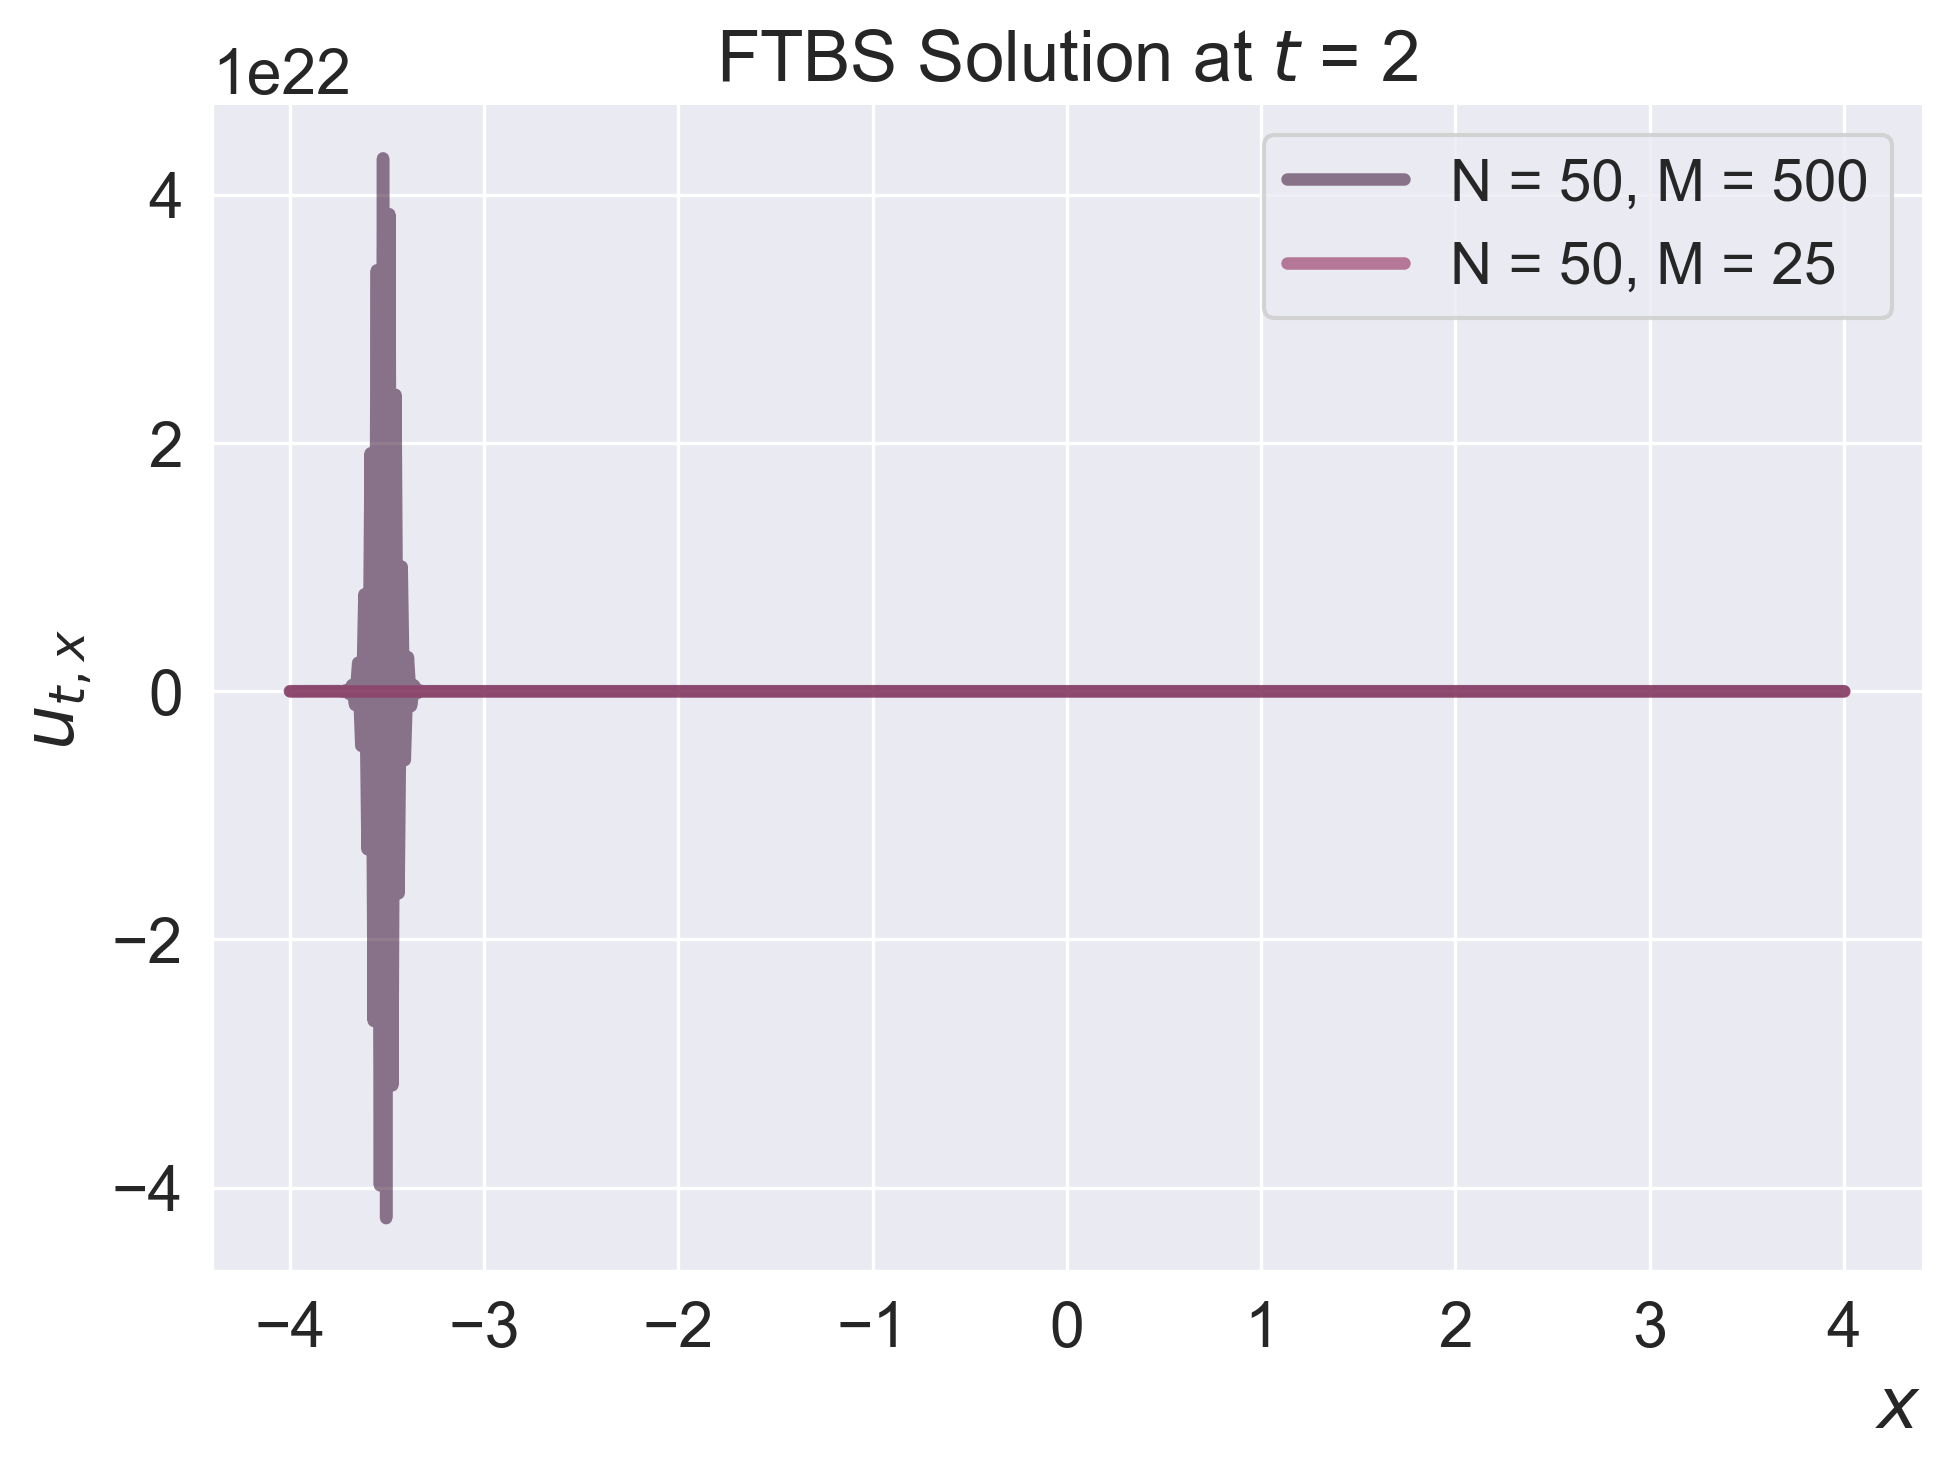

In [2]:
def BTFS_M_Greater_N():
    tN, x0, xM, a = 2, -4.0, 4.0, 1.0
        
    fig = plt.figure()
    ax = fig.add_subplot()

    grids = [(50, 500), (50, 25)]
    for idx, (N, M) in enumerate(grids):
        y_numerical, xgrid_numerical = FTBS_Scheme(x0, xM, tN, N, M, a)
        sns.lineplot(x = xgrid_numerical, y = y_numerical, label = f"N = {N}, M = {M}", linewidth = 3, alpha = 0.6, ax = ax)

    sns.despine()
    ax.set_title(f"FTBS Solution at $t$ = {tN}", loc = "center")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$")
    fig.tight_layout(pad = 0.2)
    plt.show()

BTFS_M_Greater_N()

If $M$ is chosen much larger than $N$, the numerical results will blow-up. The reason is that the FTBS scheme is an **explicit scheme**, which is only **conditionally stable** and suffers from **numerical instability** if the stability condition is not satisfied.

In the FBTS scheme, stability depends on $\lambda = \frac{a\Delta_t}{\Delta_x}$, where $\Delta_t = \frac{t_N}{N}$ and $\Delta_x = \frac{x_M - x_0}{M}$.<br>

For stability, the FBTS scheme requires $0 \le \lambda\le 1$.

For example, for $t_N = 2, x_0 = -4, x_M = 4, a = 1$, if $N = 50$ and $M = 500$, we have:
$$
\Delta_t = \frac{2}{50} = 0.04 \\
\Delta_x = \frac{8}{500} = 0.016 \\
$$ 
Thus, we get:
$$
\lambda = \frac{1\times 0.04}{0.016} = 2.5 > 1
$$

When $\lambda > 1$, the coefficient of $u_{i,j}$ become negative in $u_{i+1,j}=(1-\lambda)u_{i,j}+\lambda u_{i,j-1}$, causing sign changes and amplitude growth during time iterations. This results in oscillations and divergeence.

> The terminal values produced by the FTBS scheme reaches values greater than ${10}^{22}$, showing that the finite-difference scheme completely failed to approximate the solution of the PDE.  


---

#### *More information about this PDE*:  
With the first-order hyperbolic PDE considered in this assignment, the FTBS explicit scheme is only conditionally stable, and the stability condition is 

$${\large\left|\lambda\right|=\left|a\frac{\Delta_{t}}{\Delta_{x}}\right|\leq1}$$
This inequality is called the **Courant-Friedrichs-Lewy (CFL)** condition, and is one of the most famous inequalities in numerical analysis. In this example, the CFL condition means that $N$ needs to be greater than $M$ for the FTBS explicit scheme to converge to the analytical solution. 

---

### **Question 6**  &nbsp;&nbsp; (6 points)

Write another finite difference scheme to approximate the solution of the PDE, where the time derivative $\frac{\partial u}{\partial t}$ is approximated by **backward difference**, and the space derivative $\frac{\partial u}{\partial x}$ is approximated by **backward difference**. 

> We call this finite difference scheme **Backward in Time, Backward in Space (BTBS)**. 

Show that this finite difference scheme can be written in the following form:
$$
{\large\left.\begin{array}{lll}
(1+\lambda)u_{i+1,j}=u_{i,j}+\lambda u_{i+1,j-1} & , & 0\leq i\leq N-1,\ 1\leq j\leq M\\
u_{0,j}=f_{j} & , & 0\leq j\leq M
\end{array}\right.}
$$

What is the definition of $\lambda$?  


---

### **Answer 6**  

For the BTBS scheme, we know that:
$$
\begin{aligned}
U_t(T_i, X_j) & \approx \frac{u_{i,j} - u_{i - 1, j}}{\Delta_t} \\
U_x(T_i, X_j) & \approx \frac{u_{i, j} - u_{i, j - 1}}{\Delta_x}
\end{aligned}
$$
We take the same steps as in Question 2. 
After rearranging, we have:
$$
\begin{aligned}
(1 + \frac{a\Delta_t}{\Delta_x})u_{i,j} = u_{i - 1, j} + \frac{a\Delta_t}{\Delta_x} u_{i, j - 1}
\end{aligned}
$$
> $${\large\left.\begin{array}{lll}
(1+\lambda)u_{i,j}=u_{i-1,j}+\lambda u_{i,j-1} & , & 1\leq i\leq N,\ 1\leq j\leq M\\
u_{0,j}=f_{j} & , & 0\leq j\leq M
\end{array}\right.}$$

Replacing $i$ with $i + 1$, we have:
$$
(1 + \frac{a\Delta_t}{\Delta_x})u_{i + 1,j} = u_{i, j} + \frac{a\Delta_t}{\Delta_x} u_{i + 1, j - 1}
$$
> $${\large\left.\begin{array}{lll}
(1+\lambda)u_{i+1,j}=u_{i,j}+\lambda u_{i+1,j-1} & , & 0\leq i\leq N-1,\ 1\leq j\leq M\\
u_{0,j}=f_{j} & , & 0\leq j\leq M
\end{array}\right.}$$

So, 
$$
\lambda = \frac{a\Delta_t}{\Delta_x}
$$


---

### **Question 7**  &nbsp;&nbsp; (4 points)

Write the BTBS scheme using matrix-vector notations as
$$
{\large\mathbf{A_\ell}\cdot\mathbf{u_{i+1}}=\mathbf{u_{i}}+\mathbf{B_\ell}{{\times}}u_{i+1,-1}}
$$
where $\mathbf{A_\ell}\in\mathbb{R}^{(M+1)\times(M+1)}$ is a constant matrix, $\mathbf{B_\ell}\in\mathbb{R}^{M+1}$ is a constant vector, and $u_{i+1,-1}=u(t_{i+1},x_0-\Delta_x)$ is once again a **boundary condition** which needs to be provided in order to solve the finite-difference scheme. 

What is the definition of $\mathbf{A_\ell}$ and $\mathbf{B_\ell}$?  

---

### **Answer 7**  

We know that the $j = 0, ..., M$ equations at time $i$ are:
$$
\begin{aligned}
(1 + \lambda)u_{i + 1, 0} & - \lambda u_{i + 1, -1} & = & u_{i, 0} \\
(1 + \lambda)u_{i + 1, 1} & - \lambda u_{i + 1, 0} & = & u_{i, 1} \\
& \vdots & = & \vdots &  \\ 
(1 + \lambda)u_{i + 1, M} & - \lambda u_{i + 1, M - 1}& = & u_{i, M}
\end{aligned}
$$
In matrix notation, the system of equation is,
$$
\mathbf{P}\mathbf{u}_{i + 1, -1:M} = \mathbf{u}_{i, 0:M}
$$
where $\mathbf{P}$ is a $(M + 1)\times(M + 2)$ matrix:
$$
\mathbf{P} = 
\begin{bmatrix}
-\lambda_{-1} & (1 + \lambda)_{0} & \cdots & 0 \\
\vdots & \ddots & \ddots & \vdots \\
0 & \cdots & -\lambda_{M - 1} & (1 + \lambda)_{M}
\end{bmatrix}
$$
Thus, we get
$$
\mathbf{-B_\ell}u_{i + 1, -1} + \mathbf{A_\ell}\mathbf{u}_{i + 1} = \mathbf{u}_i
$$
where
$$
\mathbf{-B_\ell} = 
\begin{bmatrix}
-\lambda_{-1} \\
\vdots \\
\vdots \\
0
\end{bmatrix}
, \quad\quad
\mathbf{A_\ell} =
\begin{bmatrix}
(1 + \lambda)_{0} & \cdots & \cdots & \cdots & 0 \\
-\lambda_0 & (1 + \lambda)_1 & \cdots & \cdots & \vdots \\
\vdots & \ddots & \ddots & & \vdots \\
0 & \cdots & \cdots & -\lambda_{M - 1} & (1 + \lambda)_{M}
\end{bmatrix}
$$
After rearranging, we have,
$$
\mathbf{A_\ell}\mathbf{u}_{i + 1} = \mathbf{u}_i + \mathbf{B_\ell}u_{i + 1, -1}
$$
where
$$
\mathbf{\color{yellow}{A_\ell}} =
\begin{bmatrix}
(1 + \lambda)_{0} & \cdots & \cdots & \cdots & 0 \\
-\lambda_0 & (1 + \lambda)_1 & \cdots & \cdots & \vdots \\
\vdots & \ddots & \ddots & & \vdots \\
0 & \cdots & \cdots & -\lambda_{M - 1} & (1 + \lambda)_{M}
\end{bmatrix}
, \quad\quad
\mathbf{\color{yellow}B_\ell} = 
\begin{bmatrix}
\lambda_{-1} \\
\vdots \\
\vdots \\
0
\end{bmatrix}
$$
such that,  $\mathbf{A_\ell} \in \R^{(M + 1)\times(M + 1)}$ and $\mathbf{B_\ell} \in \R^{M + 1}$


---

This is a implicit scheme, and the linear system can be rewriten as:
$$
\begin{bmatrix}
1+\lambda & 0 & 0 & \cdots & 0 \\
-\lambda & 1+\lambda & 0 & \cdots & 0 \\
0 & -\lambda & 1+\lambda & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \cdots & -\lambda & 1+\lambda
\end{bmatrix}
\begin{bmatrix}
u_{i+1,0} \\
u_{i+1,1} \\
u_{i+1,2} \\
\vdots \\
u_{i+1,M}
\end{bmatrix}
=
\begin{bmatrix}
u_{i,0} \\
u_{i,1} \\
u_{i,2} \\
\vdots \\
u_{i,M}
\end{bmatrix}
+
\begin{bmatrix}
\lambda \\
0 \\
0 \\
\vdots \\
0
\end{bmatrix}
u_{i+1,-1}
$$

---

### **Question 8**  &nbsp;&nbsp; (7 points)

Once again, use the analytical solution to define the boundary condition $u_{i+1,-1}$. 

Implement the BTBS finite-difference scheme in Python. Use the same numerical parameters as in question 4. 

Plot the solution you obtain for $\{u_{N,j}\}_{j=0,\ldots,M}$.

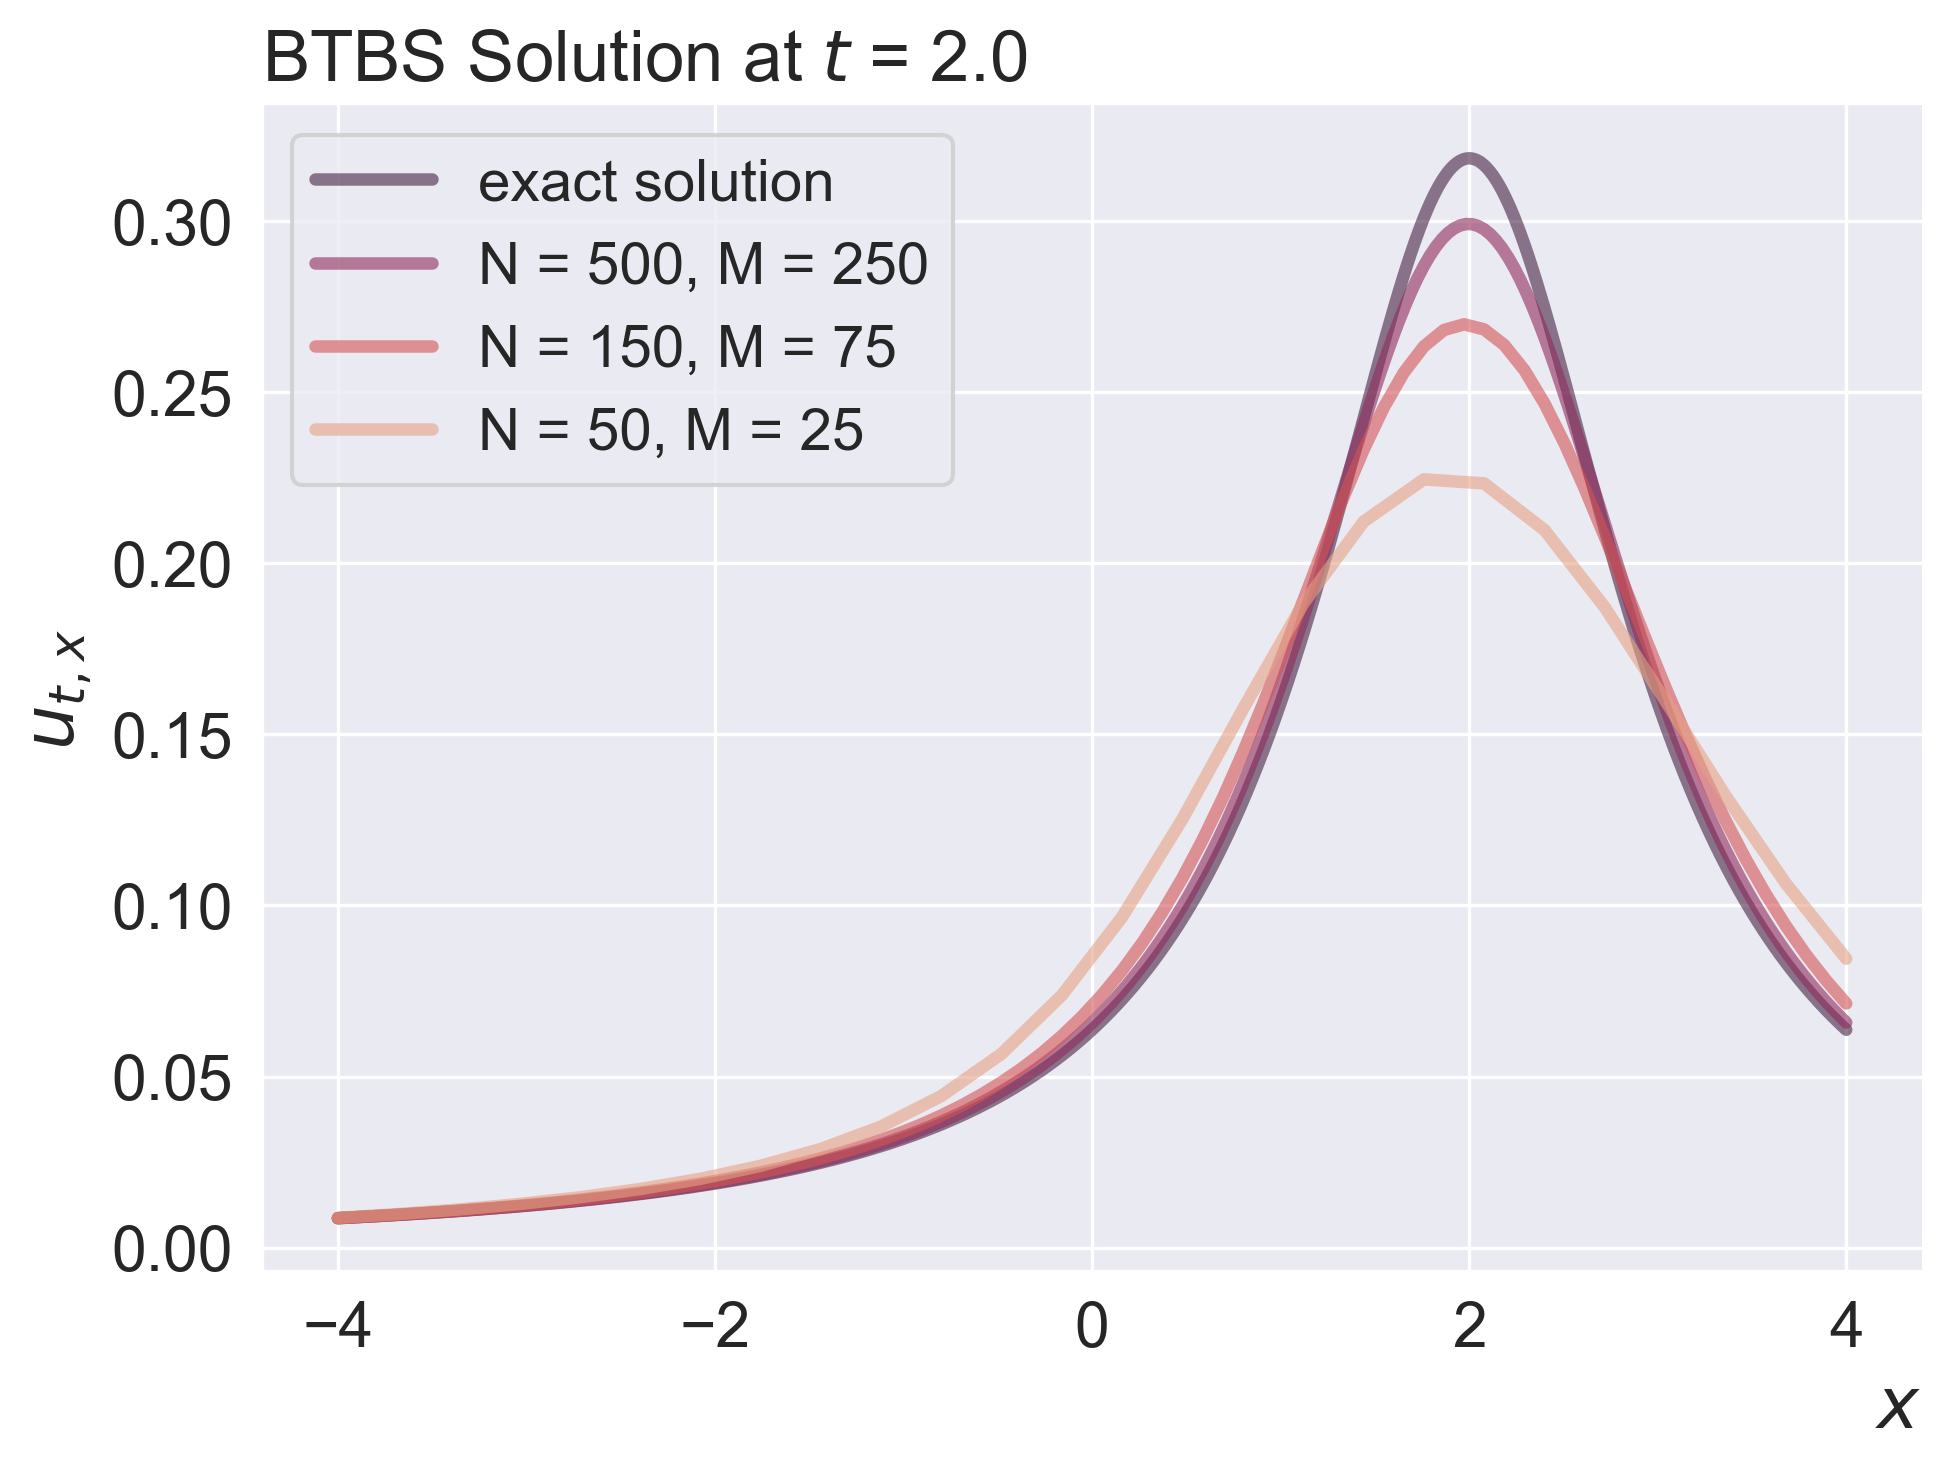

In [3]:
from scipy.sparse.linalg import spsolve

def BTBS_Scheme(x0, xM, tN, N, M, a):
    dt = tN / N
    dx = (xM - x0) /M
    lam = a * dt / dx

    tgrid = np.linspace(0.0, tN, N + 1)
    xgrid = np.linspace(x0, xM, M + 1)

    U = np.zeros([N + 1, M + 1])
    
    # Initial Condition
    U[0, :] = f(xgrid)

    # Boundary Condition
    tbound = tgrid[1:]  # Start at the second time step
    xbound = x0 - dx - a * tbound
    ubound = f(xbound)

    # Matrix Construction
    diagonals = np.ones(M + 1) * (1 + lam)
    lower_diag = np.ones(M) * (- lam)
    A = diags([lower_diag, diagonals], [-1, 0])
    B = np.zeros(M + 1)
    B[0] = lam

    # Algorithm implementation
    for i in range(N):
        rhs = U[i, :] + B * ubound[i]
        U[i + 1, :] = spsolve(A.tocsr(), rhs)

    return U[N, :], xgrid

def BTBS_plot():
    tN, x0, xM, a = 2.0, -4.0, 4.0, 1.0
    xgrid = np.linspace(x0, xM, 1001)

    fig = plt.figure()
    ax = fig.add_subplot()

    y_analytical = f(xgrid - a * tN)
    sns.lineplot(x = xgrid, y = y_analytical, label = "exact solution", linewidth = 3, alpha = 0.6, ax = ax)

    grids = [(500, 250), (150, 75), (50, 25)]
    for idx, (N, M) in enumerate(grids):
        y_numerical, xgrid_numerical = BTBS_Scheme(x0, xM, tN, N, M, a)
        sns.lineplot(x = xgrid_numerical, y = y_numerical, label = f"N = {N}, M = {M}", linewidth = 3, alpha = 0.6, ax = ax)

    sns.despine()
    ax.set_title(f"BTBS Solution at $t$ = {tN}", loc = "left")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$") 
    fig.tight_layout(pad = 0.2)
    plt.show()

BTBS_plot()

---

### **Question 9**  &nbsp;&nbsp; (7 points)

What happens to your numerical solution if you choose $M$ much larger than $N$, for example $N=50$ and $M=500$?  
Set $M=2{\times}N$, and find the lowest $N>0$ such that the maximum absolute error between the analytical solution at time $t_N$ and the BTBS scheme solution at time $t_N$ on the grid $\{x_{j}\}_{j=0,1,\ldots,M}$ is lower than $0.02$.  

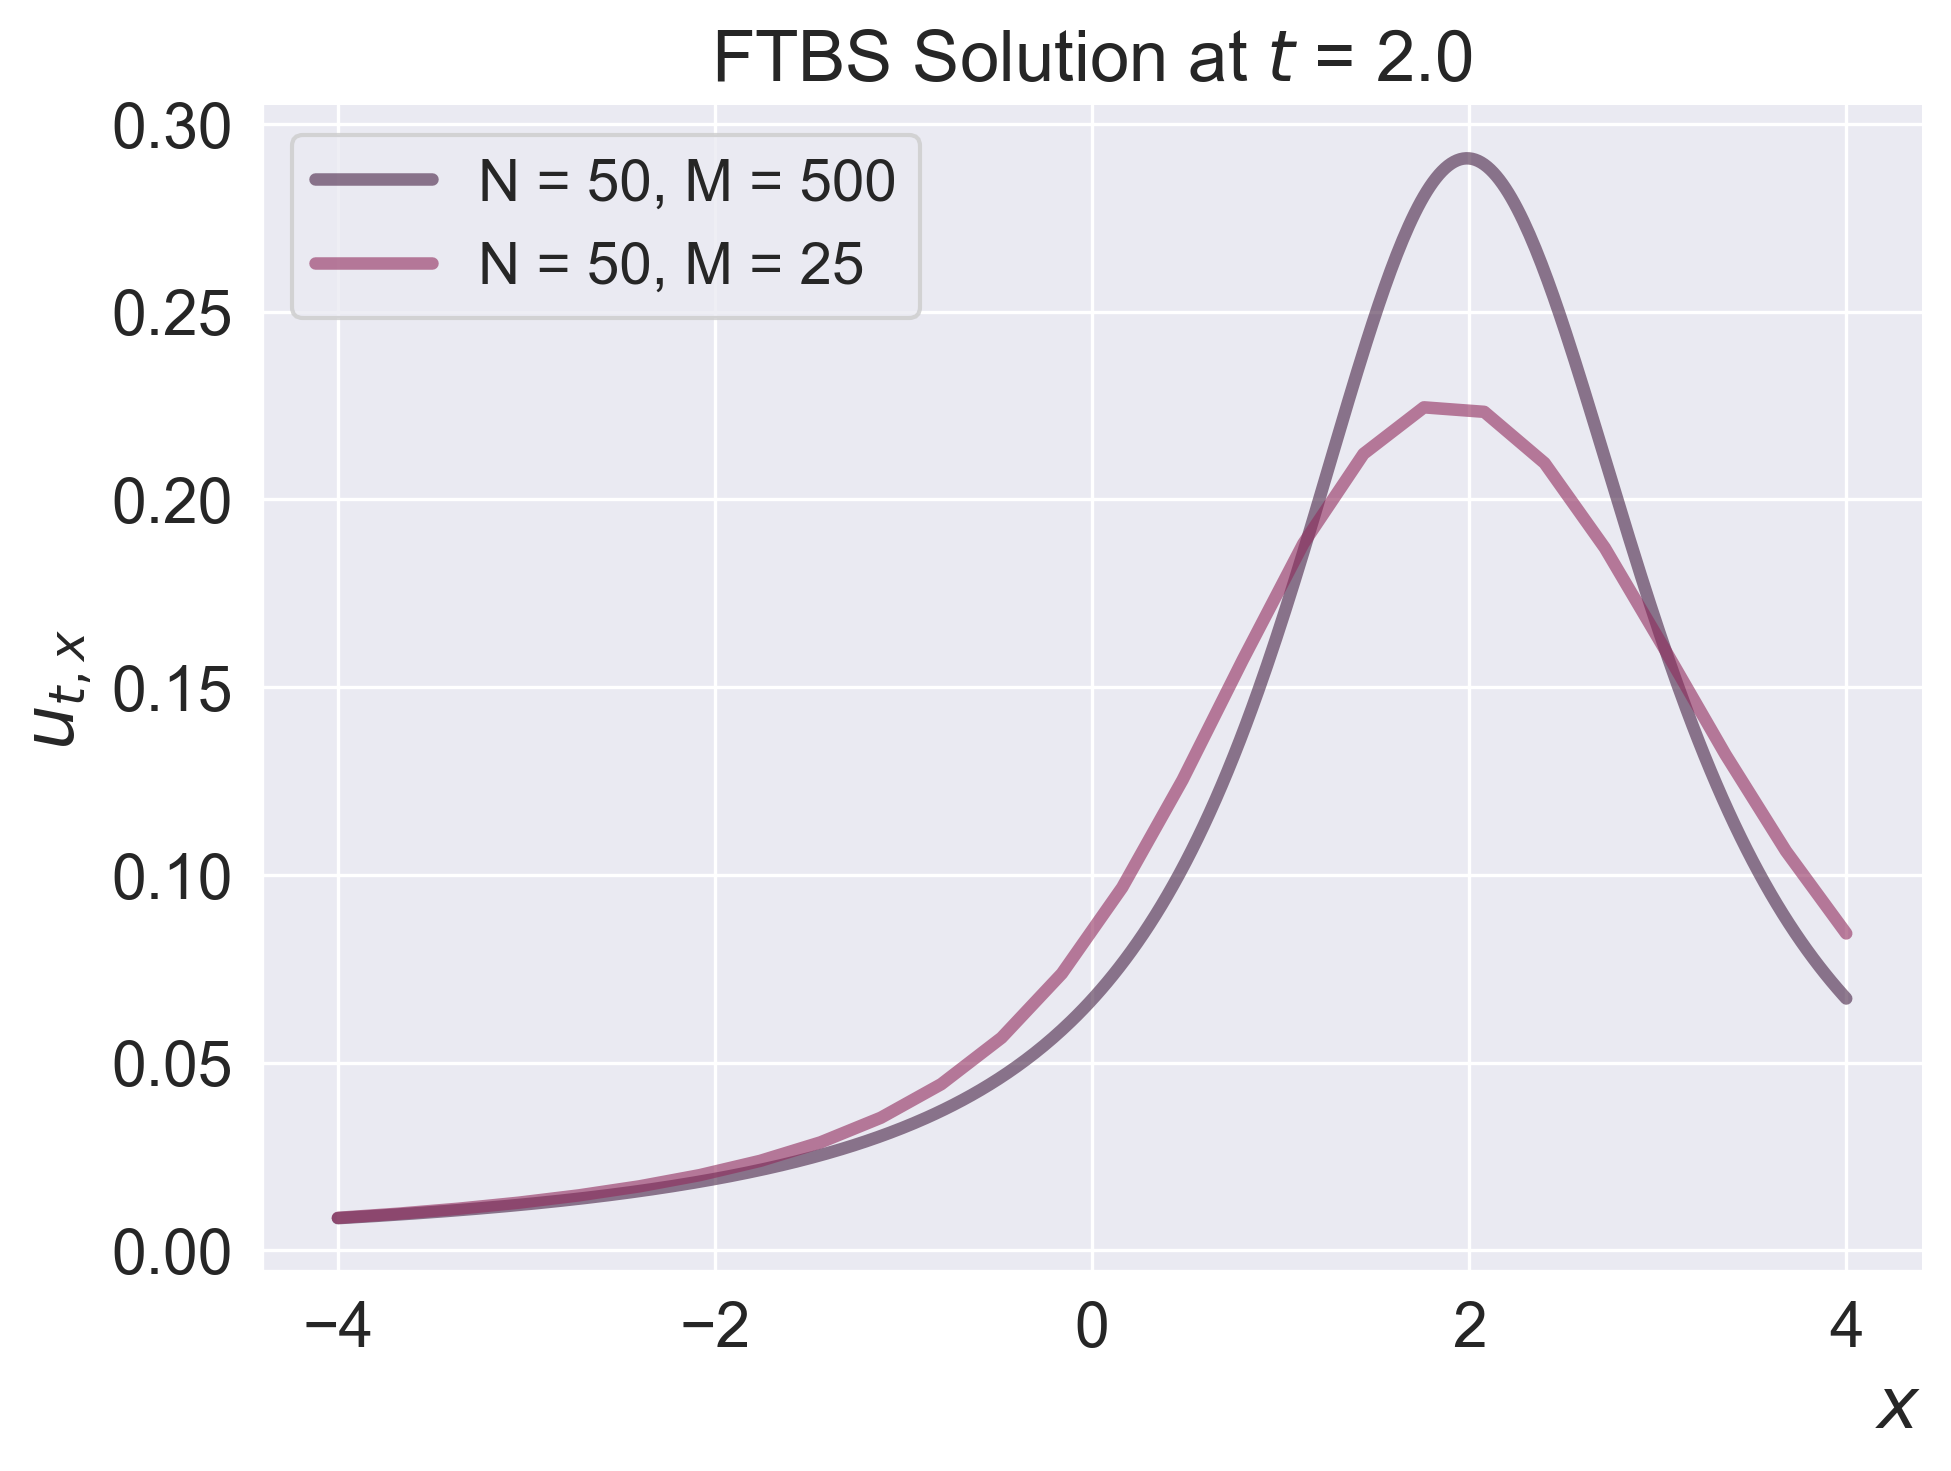

In [4]:
def BTBS_M_Greater_N():
    tN, x0, xM, a = 2.0, -4.0, 4.0, 1.0
    
    fig = plt.figure()
    ax = fig.add_subplot()

    grids = [(50, 500), (50, 25)]
    for idx, (N, M) in enumerate(grids):
        y_numerical, xgrid_numerical = BTBS_Scheme(x0, xM, tN, N, M, a)
        sns.lineplot(x = xgrid_numerical, y = y_numerical, label = f"N = {N}, M = {M}", linewidth = 3, alpha = 0.6, ax = ax)

    sns.despine()
    ax.set_title(f"FTBS Solution at $t$ = {tN}", loc = "center")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$")
    fig.tight_layout(pad = 0.2)
    plt.show()

BTBS_M_Greater_N()

As the diagram shows, the BTBS scheme is unconditionally stable and closer and  closer to the analytical solution as the grid becomes finer.

With the BTBS scheme, there is no numerical stability problem when $M$ is much larger than $N$. 

Indeed, the BTBS scheme is an **implicit scheme**, which is always **unconditionally stable**.

In [5]:
def Find_Optimal_N(target_error):
    tN, x0, xM, a = 2.0, -4.0, 4.0, 1.0

    Indicator = True
    Count = 0
    N = 1
    M = 2 * N
    while Indicator:
        xgrid = np.linspace(x0, xM, M + 1)
        y_analytical = f(xgrid - a * tN)

        y_numerical, _ = BTBS_Scheme(x0, xM, tN, N, M, a)
        error = np.max(np.abs(y_numerical - y_analytical))
        
        if error < target_error:
            Indicator = False
            return N, error
        
        Count += 1
        N += 1
        M = 2 * N
        
        if Count > 1_000:
            break

    return "Time out!"

N, error = Find_Optimal_N(target_error = 0.02)

print(f"The optimal (lowest) N is: {N}")
print(f"At optimal N, the error is: {error}")

The optimal (lowest) N is: 159
At optimal N, the error is: 0.019955096161450636


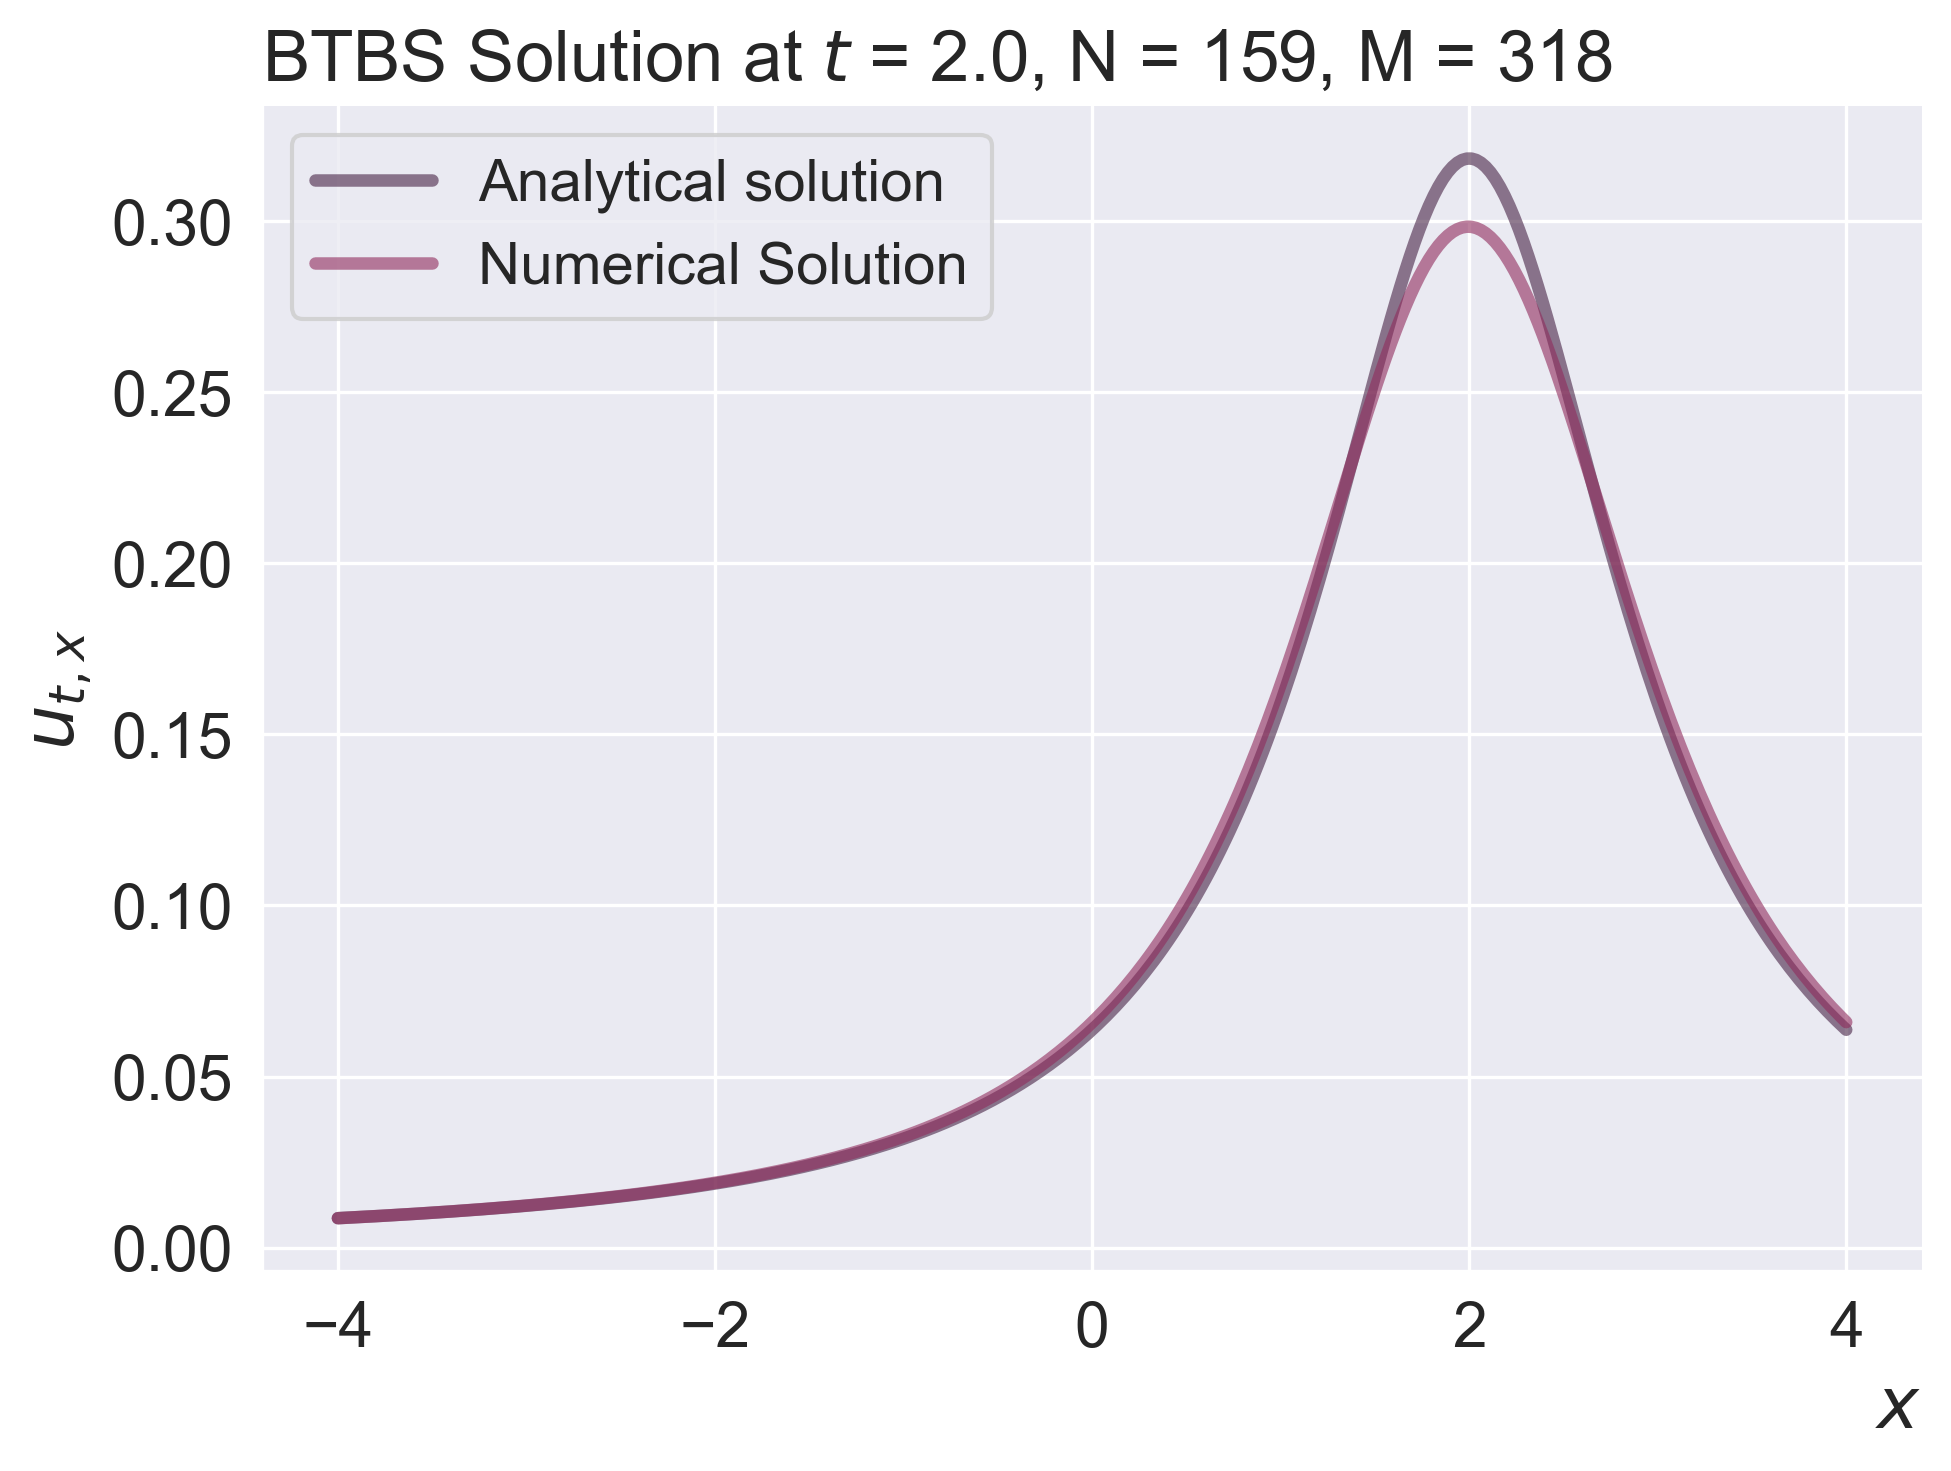

In [6]:
def Verify_absolute_error():
    tN, x0, xM, a = 2.0, -4.0, 4.0, 1.0
    N, M = 159, 159 * 2
    xgrid = np.linspace(x0, xM, M + 1)

    fig = plt.figure()
    ax = fig.add_subplot()

    y_analytical = f(xgrid - a * tN)
    y_numerical, _ = BTBS_Scheme(x0, xM, tN, N, M, a)
    sns.lineplot(x = xgrid, y = y_analytical, label = "Analytical solution", linewidth = 3, alpha = 0.6, ax = ax)
    sns.lineplot(x = xgrid, y = y_numerical, label = "Numerical Solution", linewidth = 3, alpha = 0.6, ax = ax)
    
    sns.despine()
    ax.set_title(f"BTBS Solution at $t$ = {tN}, N = {N}, M = {M}", loc = "left")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$") 
    fig.tight_layout(pad = 0.2)
    plt.show()

Verify_absolute_error()